In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [103]:
X, y = make_classification(n_samples=10000,
                           n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           n_clusters_per_class=1,
                           class_sep=1,
                           shift=5,
                           scale=2.0)

df = pd.DataFrame(X, columns=['x1'])
df['y'] = y

#df['x1'] = df['x1'] * 10 + 20

In [291]:
n_samples = 500

sigma1 = 1
mu1 = 5
X1 = sigma1 * np.random.randn(n_samples) + mu1
y1 = [1] * n_samples

sigma2 = 1
mu2 = 3
X2 = sigma2 * np.random.randn(n_samples) + mu2
#X2 = random_snorm(5000, mu2, sigma2)
y2 = [0] * n_samples

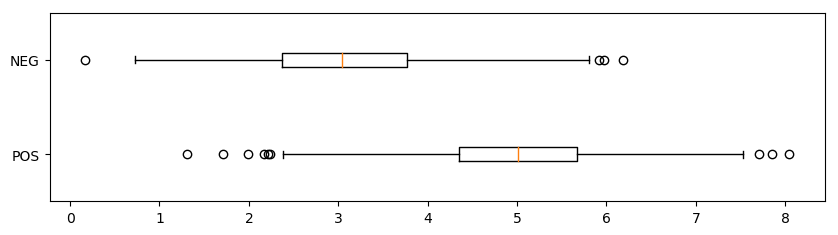

In [292]:
fig = plt.figure(figsize=(10,2.5), dpi=100)
fig.subplots_adjust(wspace=0.0)
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot([X1, X2], vert=False, labels=['POS', 'NEG'])
plt.show()

---

In [293]:
X = np.array([X1] + [X2]).reshape(-1,1)
y = np.array(y1 + y2)
X.shape, y.shape

((1000, 1), (1000,))

In [294]:
lrest = LogisticRegression(solver='liblinear')

In [295]:
lrest.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [296]:
print('logit = {:.6f}x + {:.5f}'.format(lrest.coef_[0,0], lrest.intercept_[0]))

logit = 1.488645x + -5.96142


In [297]:
xtest2 = np.arange(0,8,0.01).reshape(-1,1)
xtest2.shape

(800, 1)

In [298]:
ytest2 = lrest.predict_proba(xtest2)

In [299]:
ytest2.shape

(800, 2)

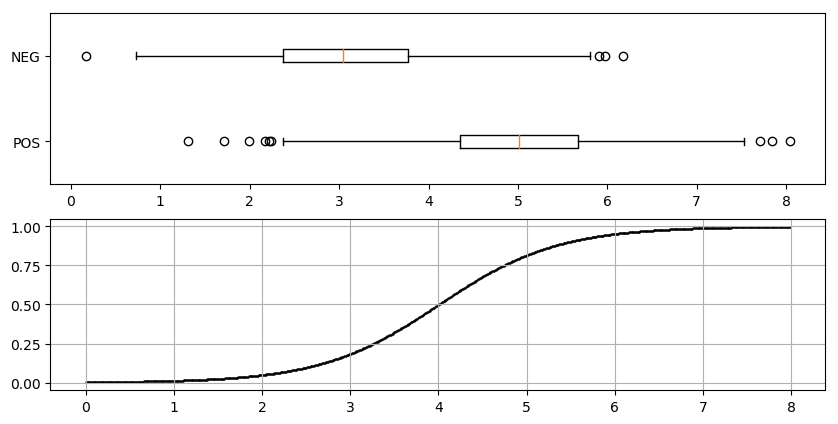

In [302]:
fig = plt.figure(figsize=(10,5), dpi=100)

ax1 = fig.add_subplot(2,1,1)
ax1.boxplot([X1, X2], vert=False, labels=['POS', 'NEG'])

ax2 = fig.add_subplot(2,1,2)
ax2.grid()
ax2.scatter(list(xtest2), list(ytest2[:,1]), s=0.5, color='k')
ax2.yaxis.set_ticks([0.0, 0.25, 0.5, 0.75, 1.0])

#plt.scatter(X[:,0], y, s=50, color='k', marker='x')
#plt.ylabel('Probability of Default')
#plt.xlabel('Balance')

plt.show()

In [203]:
from scipy.stats import skewnorm

In [204]:
skewnorm.rvs(0.5, )

0.35781873905487627

In [209]:
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean

In [250]:
lrest.

0.0001